# Machine Learning 2022
## Lab. 8 - Anomaly detection
### Imię i nazwisko: Kacper Moździerz
### Nr albumu: 401733
### Data: 10.05.2022

### Grupa: wtorek 9:30 - 11:00

#### 1.Loading data

In [6]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']   
X.shape

(307, 2)

#### 2.Data visualization

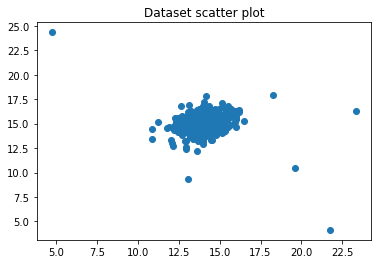

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.title("Dataset scatter plot")
plt.show()


#### 3. Histograms

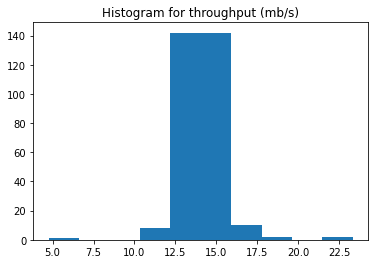

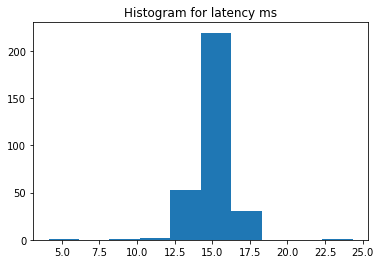

In [8]:
plt.figure()
plt.title("Histogram for throughput (mb/s)")
plt.hist(X[:,0])
plt.show()
plt.figure()
plt.title("Histogram for latency ms")
plt.hist(X[:,1])
plt.show()

We can assume that analyzed data don't need to by scaled

#### 4. Gaussian distribution

In [9]:
def estimate_gaussian(X):

    sigma = np.std(X)
    mu = np.mean(X)

    return mu, sigma


print(f"Estimated gaussian parameters for throughput: {estimate_gaussian(X[:,0])}")
print(f"Estimated gaussian parameters for latency: {estimate_gaussian(X[:,1])}")

Estimated gaussian parameters for throughput: (14.112225783945592, 1.353747174879607)
Estimated gaussian parameters for latency: (14.99771050813621, 1.3075723042450764)


#### 5. Calculate probability


In [10]:
Xval = data['Xval']  
yval = data['yval']

In [11]:
from scipy import stats

mu1, sigma1 = estimate_gaussian(X[:,0])
mu2, sigma2 = estimate_gaussian(X[:,1])

stats.norm.pdf(X[0:50,0],mu1,sigma1)

array([0.21620977, 0.25745208, 0.29413223, 0.24721192, 0.27251547,
       0.2918119 , 0.18713958, 0.15117648, 0.09356331, 0.166609  ,
       0.29338708, 0.29448769, 0.25559237, 0.25595621, 0.2932714 ,
       0.2944456 , 0.29288017, 0.28518331, 0.27727759, 0.09489765,
       0.27027271, 0.29342161, 0.24110555, 0.29304288, 0.19607729,
       0.15652979, 0.27590459, 0.25749622, 0.27667047, 0.2834953 ,
       0.17068283, 0.29318613, 0.20432637, 0.19577297, 0.10897052,
       0.24595126, 0.14063746, 0.29463374, 0.28052751, 0.29371857,
       0.28168158, 0.22524293, 0.28218942, 0.29429662, 0.26674962,
       0.28856013, 0.11137104, 0.29467721, 0.28904196, 0.18556585])

In [12]:
stats.norm.pdf(X[0:50,0],mu2,sigma2)

array([0.10024482, 0.1457768 , 0.2528107 , 0.30448732, 0.16903845,
       0.21756518, 0.07643788, 0.26665451, 0.20512585, 0.0622584 ,
       0.22598194, 0.23611076, 0.14325919, 0.14374689, 0.22523921,
       0.24945533, 0.22291698, 0.28027594, 0.29025968, 0.02506057,
       0.16517238, 0.22620962, 0.3050326 , 0.25973477, 0.29516159,
       0.27092849, 0.17525126, 0.30215305, 0.29084495, 0.28286926,
       0.28109791, 0.22470976, 0.08990657, 0.08300238, 0.22451675,
       0.30464676, 0.04678789, 0.23909217, 0.28675261, 0.25593038,
       0.28533142, 0.10877075, 0.28467192, 0.25122693, 0.29812758,
       0.20540556, 0.22733301, 0.24443463, 0.2069744 , 0.29000605])

In [13]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm.pdf(Xval[:,0],mu1,sigma1)
pval[:,1] = stats.norm.pdf(Xval[:,1],mu2,sigma2)

#### 6. Selecting the threshold

In [19]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval): 

    iter = np.linspace(pval.min(),pval.max(),10000)
    best_f1 = -np.inf
    best_epsilon = 0
    for eps in iter:
        y_pred = np.array((pval[:, 0] < eps) | (pval[:, 1] < eps), dtype=int)
        if f1_score(yval, y_pred) > best_f1:
            best_f1 = f1_score(yval, y_pred)
            best_epsilon = eps
    return best_epsilon, best_f1

In [23]:
best_epsilon, best_f1 = select_threshold(pval, yval)
print(f"Best epsilon: {best_epsilon:.6f}\nBest F1 Score: {best_f1:.6f}")

Best epsilon: 0.000397
Best F1 Score: 0.875000


#### 7. Detecting anomalies

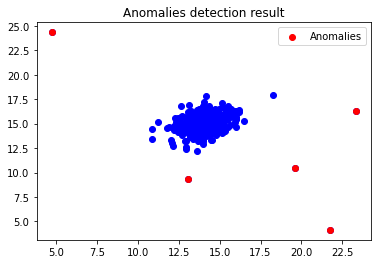

In [33]:
p = np.zeros((X.shape[0], X.shape[1]))  
p[:,0] = stats.norm.pdf(X[:,0],mu1,sigma1)
p[:,1] = stats.norm.pdf(X[:,1],mu2,sigma2)

index = np.where((p[:, 0] < best_epsilon) | (p[:, 1] < best_epsilon))
anomalies = X[index]


plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r',label= "Anomalies")
plt.legend()
plt.title("Anomalies detection result")
plt.show()